In [ ]:
import pickle
import torch
import numpy as np
import scipy
import os

In [154]:
def KL_divergence(mean1, mean2, covariance1, covariance2):
    assert covariance1.shape == covariance2.shape
    d = covariance1.shape[0]
    mean1 = mean1.type(torch.float64)
    mean2 = mean2.type(torch.float64)
    covariance1 = covariance1.type(torch.float64)
    covariance2 = covariance2.type(torch.float64)
    product = covariance2 @ torch.linalg.inv(covariance1)
    scal_prod = torch.t(mean2-mean1) @ torch.linalg.inv(covariance2) @ (mean2-mean1)
    print(torch.logdet(product))
    print(torch.trace(product))
    print(scal_prod)
    return 1 / 2 * torch.logdet(product) - d / 2 + 1 / 2 * torch.trace(product) + 1 / 2 * scal_prod

In [131]:
def KL1(covariance1, covariance2):
    assert covariance1.shape == covariance2.shape
    d = covariance1.shape[0]
    covariance1 = covariance1.type(torch.float64)
    covariance2 = covariance2.type(torch.float64)
    product = covariance2 @ torch.linalg.inv(covariance1)
    return 1 / 2 * torch.logdet(product) - d / 2

In [132]:
def KL2(covariance1, covariance2):
    assert covariance1.shape == covariance2.shape
    covariance1 = covariance1.type(torch.float64)
    covariance2 = covariance2.type(torch.float64)
    product = covariance2 @ torch.linalg.inv(covariance1)
    return 1 / 2 * torch.trace(product)

In [133]:
def KL3(mean1, mean2, covariance2):
    assert covariance1.shape == covariance2.shape
    mean1 = mean1.type(torch.float64)
    mean2 = mean2.type(torch.float64)
    covariance2 = covariance2.type(torch.float64)
    scal_prod = torch.t(mean2-mean1) @ torch.linalg.inv(covariance2) @ (mean2-mean1)
    return 1 / 2 * scal_prod

In [134]:
path = "./class_barycenter/COCO_train"
mean = [x for x in sorted(os.listdir(path),
                             key=lambda item: (int(item.partition('_')[0])
                                               if item[0].isdigit() else float('inf'), item))
           if x.split('_')[1] == 'mean.pkl']

cov = [x for x in sorted(os.listdir(path),
                             key=lambda item: (int(item.partition('_')[0])
                                               if item[0].isdigit() else float('inf'), item))
           if x.split('_')[1] == 'cov.pkl']

In [135]:
import numpy as np

n = len(mean)
heatmap = np.zeros((n, n))
heatmap1 = np.zeros((n, n))
heatmap2 = np.zeros((n, n))
heatmap3 = np.zeros((n, n))

In [136]:
from tqdm import tqdm

for i in tqdm(range(n)):
    mean1_path = os.path.join(path, mean[i])
    cov1_path = os.path.join(path, cov[i])
    with open(mean1_path, 'rb') as f:
        mean1 = pickle.load(f)
    with open(cov1_path, 'rb') as f:
        covariance1 = pickle.load(f)
    for j in range(n):
        mean2_path = os.path.join(path, mean[j])
        cov2_path = os.path.join(path, cov[j])
        with open(mean2_path, 'rb') as f:
            mean2 = pickle.load(f)
        with open(cov2_path, 'rb') as f:
            covariance2 = pickle.load(f)

        heatmap[i, j] = KL_divergence(mean1, mean2, covariance1, covariance2)
        heatmap1[i, j] = KL1(covariance1, covariance2)
        heatmap2[i, j] = KL2(covariance1, covariance2)
        heatmap3[i, j] = KL3(mean1, mean2, covariance2)

100%|██████████| 80/80 [23:08<00:00, 17.35s/it]


In [119]:
mean[13]

'21_mean.pkl'

In [152]:
heatmap[70, 78] = np.nan

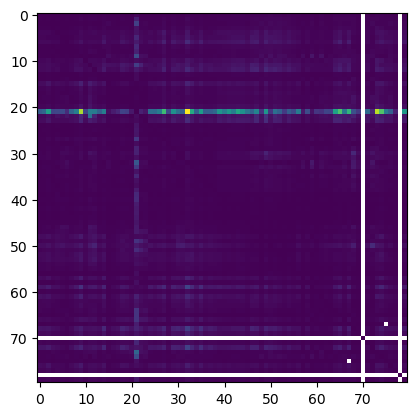

In [153]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(heatmap)

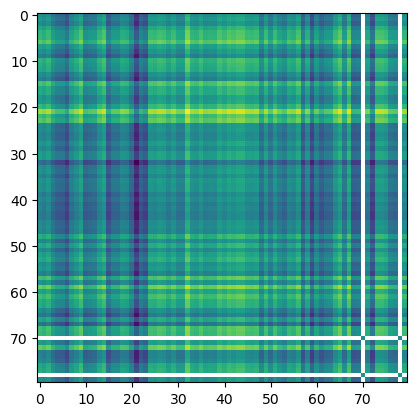

In [138]:
plt.imshow(heatmap1)

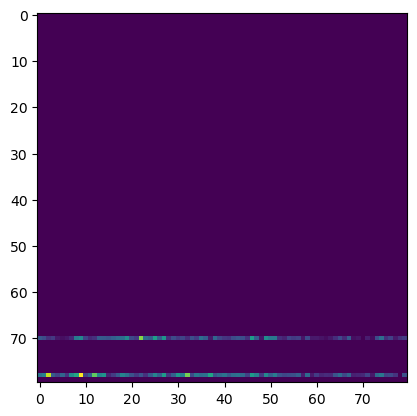

In [139]:
plt.imshow(heatmap2)

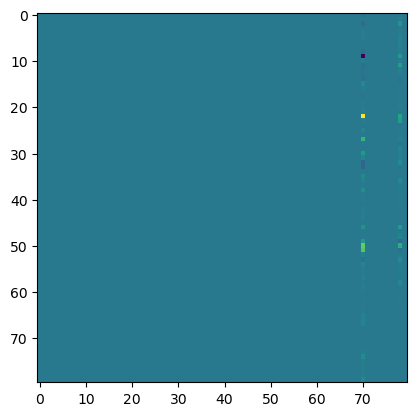

In [140]:
plt.imshow(heatmap3)

In [179]:
path = './class_barycenter/watercolor_train'
path

'./class_barycenter/watercolor_train'

In [180]:
mean1_path = os.path.join(path, '0_mean.pkl')
cov1_path = os.path.join(path, '0_cov.pkl')
with open(mean1_path, 'rb') as f:
    mean1 = pickle.load(f)
with open(cov1_path, 'rb') as f:
    covariance1 = pickle.load(f)

mean2_path = os.path.join(path, '1_mean.pkl')
cov2_path = os.path.join(path, '1_cov.pkl')
with open(mean2_path, 'rb') as f:
    mean2 = pickle.load(f)
with open(cov2_path, 'rb') as f:
    covariance2 = pickle.load(f)

In [165]:
KL_divergence(mean1, mean2, covariance1, covariance2)

tensor(-36.0915, device='cuda:0', dtype=torch.float64)
tensor(6.6630e+08, device='cuda:0', dtype=torch.float64)
tensor(1.0372e+08, device='cuda:0', dtype=torch.float64)


tensor(3.8501e+08, device='cuda:0', dtype=torch.float64)

In [189]:
eig = torch.linalg.eig(covariance1).eigenvalues.cpu().numpy()

In [195]:
for e in eig:
    print(e)

(6.9634323+0j)
(2.684684+0j)
(2.0160987+0j)
(1.6765702+0j)
(1.6268952+0j)
(1.3972803+0j)
(1.2988787+0j)
(1.0992669+0j)
(1.0648221+0j)
(0.95049495+0j)
(0.8716482+0j)
(0.7770909+0j)
(0.67738485+0j)
(0.6055781+0j)
(0.5731462+0j)
(0.53589624+0j)
(0.51738214+0j)
(0.49308756+0j)
(0.4853079+0j)
(0.46321502+0j)
(0.42470777+0j)
(0.39747575+0j)
(0.37808612+0j)
(0.34897345+0j)
(0.34545332+0j)
(0.33079654+0j)
(0.32389733+0j)
(0.30677688+0j)
(0.29066172+0j)
(0.2817491+0j)
(0.27501518+0j)
(0.26311758+0j)
(0.25459632+0j)
(0.2442506+0j)
(0.22847904+0j)
(0.22370462+0j)
(0.22032575+0j)
(0.21386717+0j)
(0.20570736+0j)
(0.19940381+0j)
(0.18871425+0j)
(0.18454257+0j)
(0.18008612+0j)
(0.17479959+0j)
(0.16811581+0j)
(0.16151841+0j)
(0.1597957+0j)
(0.15181498+0j)
(0.1495424+0j)
(0.14727382+0j)
(0.14309822+0j)
(0.13501497+0j)
(0.13436407+0j)
(0.13049689+0j)
(0.12799318+0j)
(0.12661482+0j)
(0.123044126+0j)
(0.11840418+0j)
(0.11488774+0j)
(0.11220631+0j)
(0.110493176+0j)
(0.1085406+0j)
(0.106281124+0j)
(0.104246

In [160]:
covariance1 = covariance1.type(torch.float64)

torch.linalg.det(covariance2)

tensor(0., device='cuda:0')

In [196]:
with open("./heatmaps/DeepFruits_val/heatmap.pkl", "rb") as f:
    heatmap_water = pickle.load(f)

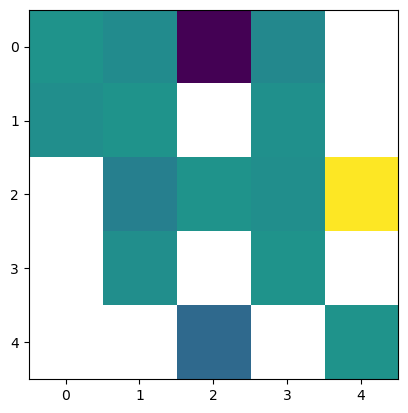

In [197]:
%matplotlib inline
plt.imshow(heatmap_water)
plt.show()